<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>Comp 555 BioAlgorithms - Spring 2021</h1>
<h1 style="font-size: 250%;">Problem Set #1 </h1>
<h1 style="font-size: 150%;">Version 1.0</h1>
<h1>Issued Tuesday, 2/2/2021; Due Thursday, 2/18/2021</h1>
</div>

**Homework Information:** Some of the problems are probably too long to be done the night before the due date, so plan accordingly. Late problem sets will not be accepted. Feel free to get help from others, but **the work you submit in should be your own.** It is very important that you enter your answers in the provided cells. You can add extra cells to explore approaches, but only the provided cell can and will be graded.

**Warning:** This notebook has been annotated with metadata so that it can be uploaded to the grading system. Thus, if you delete a cell and add a replacement, there is a possiblity that your problem will not be graded. If you ever need to start over, you should download a new version of the problem set and transfer your solutions to it.

In [1]:
# Replace the following string values with the requested information
# Leave the quotation marks surronding the string!
class Student:
    first = "Katelyn"
    last = "Cline"
    onyen = "katelyn9"
    pid = "730152239"

This problem set will examine the viral genome <a href="http://csbio.unc.edu/mcmillan/Comp555S21/data/SARS_CoV-2.fa" download="SARS_CoV-2.fa">SARS_CoV-2.fa</a>, the <a href="http://csbio.unc.edu/mcmillan/Comp555S21/data/GCA_000001405.15_GRCh38_genomic.fna" download="GCA_000001405.15_GRCh38_genomic.fna">human genome</a>, and the Long Terminal Repeat sequence from HERV-K, <a href="http://csbio.unc.edu/mcmillan/Comp555S21/data/LTR14A.fa" download="LTR14A.fa">LTR14A.fa</a>.

The cell below provides various functions and imports necessary for this problem set. Do not import any addtional packages. Also, make sure that you ***run the following cell***.

In [2]:
import gzip
import itertools
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into two lists. One of 
        headers and a second list of sequences.
        The ith index of each list correspond."""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

---
**Problem #1:**

Write a function that produces a list of ***missing*** <em>k</em>-mers from a given sequence. If all possible *k*-mers are present the fnctions should return an empty list. A template for the function is provided in the cell below, you should modify it in your answer. This cell should include ***only your function*** definition and no other code. A cell for testing is provided after.

In [3]:
# This cell is graded
def MissingKmers(dnaseq, k):
    """ Returns a list of missing k-mers in "dnaseq", for the given value of "k".
        The cahracters of the string "dnaseq" is from the alphabet "ACGT" """
    missing  = []
    possible = []
    
    #create dictionary of present kmers
    kmerDict = {}
    for i in range(1,len(dnaseq)-k+1):
        kmer = dnaseq[i:i+k]
        kmerDict[kmer] = kmerDict.get(kmer,0) + 1
    
    # if length of kmerDict equals 4^k then all possible kmers are present and none are missing
    if (len(kmerDict) == (4**k)):
        return missing
    else:
        #create all the possible k-mers
        for number in itertools.product(("A", "C", "G", "T"), repeat = k):
            possible.append(''.join(number))
        for x in possible:
            if x not in kmerDict.keys():
                missing.append(x)
  
    return missing

The following cell below is provided for testing your code. You should test it on SARS-Cov-2.fa using the following values for k, [4,5,6], and compare your answers to the predictions from Lecture 2. This cell will not be considered during grading.

In [4]:
header, seq = loadFasta("data/SARS-CoV-2.fa")
print(len(MissingKmers(seq[0], 5)))
%time print(MissingKmers(seq[0], 5))
# print(seq[0])

poss = []
for number in itertools.product(("A", "C", "G", "T"), repeat = 2):
    poss.append(''.join(number))
print(poss)
print(len(poss))


1
['CGGGG']
Wall time: 20 ms
['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
16


---
**Problem #2:**

Apply your function from **Problem #1** to the sequence from Human Chromosome 1 with a *k* value of 11. Examine the list of missing k-mers and answer the following questions. How many of the possible 11-mers are missing from Chromosome 1? Comment on whether you can see any sort of pattern in these missing k-mers and what that pattern is. 

In [5]:
seq = open('data/genomes/Chr1.seq', 'r').read()
%time missing = MissingKmers(seq, 11)
print(len(missing))
# print(missing)

Wall time: 2min 38s
147720


{'AA': 0, 'AC': 0, 'AG': 0, 'AT': 0, 'CA': 0, 'CC': 0, 'CG': 0, 'CT': 0, 'GA': 0, 'GC': 0, 'GG': 0, 'GT': 0, 'TA': 0, 'TC': 0, 'TG': 0, 'TT': 0}
16
{'AA': 42895, 'AC': 84270, 'AG': 37306, 'AT': 58208, 'CA': 33862, 'CC': 52153, 'CG': 146483, 'CT': 36392, 'GA': 84344, 'GC': 98403, 'GG': 55326, 'GT': 85274, 'TA': 69498, 'TC': 79712, 'TG': 33480, 'TT': 41413}


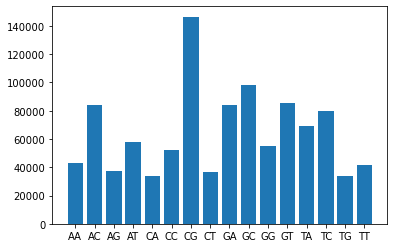

In [6]:
# ANALYZE MISSING 2-MERS

#make all possible 2-mers
possTwo = {}
for number in itertools.product(("A", "C", "G", "T"), repeat = 2):
    possTwo[''.join(number)] = 0
print(possTwo)
print(len(possTwo))

#calculate how many of each possible 2mers are missing
k = 2
for kmer in missing:
    smallKmerDict = {}
    for i in range(1,len(kmer)-k+1):
        km = kmer[i:i+k]
        smallKmerDict[km] = smallKmerDict.get(km,0) + 1
    for x in smallKmerDict:
        possTwo[x] += 1
print(possTwo)

# plot the missing 2-mers
plt.bar(range(len(possTwo)), list(possTwo.values()), align='center')
plt.xticks(range(len(possTwo)), list(possTwo.keys()))
plt.show()

{'AAA': 0, 'AAC': 0, 'AAG': 0, 'AAT': 0, 'ACA': 0, 'ACC': 0, 'ACG': 0, 'ACT': 0, 'AGA': 0, 'AGC': 0, 'AGG': 0, 'AGT': 0, 'ATA': 0, 'ATC': 0, 'ATG': 0, 'ATT': 0, 'CAA': 0, 'CAC': 0, 'CAG': 0, 'CAT': 0, 'CCA': 0, 'CCC': 0, 'CCG': 0, 'CCT': 0, 'CGA': 0, 'CGC': 0, 'CGG': 0, 'CGT': 0, 'CTA': 0, 'CTC': 0, 'CTG': 0, 'CTT': 0, 'GAA': 0, 'GAC': 0, 'GAG': 0, 'GAT': 0, 'GCA': 0, 'GCC': 0, 'GCG': 0, 'GCT': 0, 'GGA': 0, 'GGC': 0, 'GGG': 0, 'GGT': 0, 'GTA': 0, 'GTC': 0, 'GTG': 0, 'GTT': 0, 'TAA': 0, 'TAC': 0, 'TAG': 0, 'TAT': 0, 'TCA': 0, 'TCC': 0, 'TCG': 0, 'TCT': 0, 'TGA': 0, 'TGC': 0, 'TGG': 0, 'TGT': 0, 'TTA': 0, 'TTC': 0, 'TTG': 0, 'TTT': 0}
64
{'AAA': 5924, 'AAC': 19633, 'AAG': 6700, 'AAT': 10615, 'ACA': 7123, 'ACC': 18075, 'ACG': 54162, 'ACT': 9550, 'AGA': 5833, 'AGC': 13522, 'AGG': 4826, 'AGT': 9506, 'ATA': 13857, 'ATC': 22395, 'ATG': 8118, 'ATT': 10311, 'CAA': 8869, 'CAC': 10222, 'CAG': 3314, 'CAT': 7894, 'CCA': 4200, 'CCC': 7269, 'CCG': 40362, 'CCT': 4660, 'CGA': 59440, 'CGC': 60597, 'CGG'

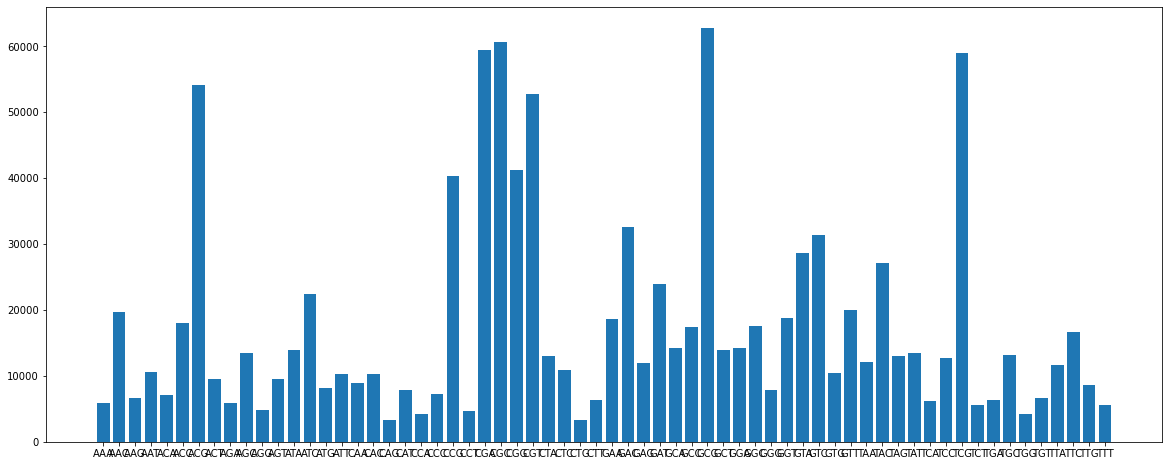

ACG
CGA
CGC
CGT
GCG
TCG


In [7]:
# ANALYZE MISSING 3-MERS

#make all possible 3-mers
possThree = {}
for number in itertools.product(("A", "C", "G", "T"), repeat = 3):
    possThree[''.join(number)] = 0
print(possThree)
print(len(possThree))

#calculate how many of each possible 3mers are missing
k = 3
for kmer in missing:
    smallKmerDict = {}
    for i in range(1,len(kmer)-k+1):
        km = kmer[i:i+k]
        smallKmerDict[km] = smallKmerDict.get(km,0) + 1
    for x in smallKmerDict:
        possThree[x] += 1
print(possThree)

# plot the missing 3-mers
fig = plt.figure(figsize=(20,8))
plt.bar(range(len(possThree)), list(possThree.values()), align='center')
plt.xticks(range(len(possThree)), list(possThree.keys()))
plt.show()

for x in possThree:
    if possThree[x] > 45000:
        print(x)

---
**Problem #3:**

Given *only* the list of missing 11-mers from Problem #2, predict how many 10-mers are missing. Also, using *only* these missing 11-mers, predict a lower-bound of the number of missing 12-mers in Chromosome 1 and given a breif explaination for your prediction.

---
**Problem #4:**

According to the code from Lecture 4, a first step of searching for instances of the Long Terminal Repeat sequence, LTR14A, in the human genome is to find a list of *(position, kmer-index)* tuples, which were then plotted. If we allow for a maximum of 10 bases that differ from the given 344 base sequence (assuming only simple substitutions), what is the smallest number of matching 19-mers possible? Explain your reasoning. 

---
**Problem #5:**

The goal of this problem is to make a list identifying potential full ERVs in the human genome. Write a code fragment that uses the (position, kmer-index) tuples from Lecture 4 to find all LTR pairs satisfying the following conditions:

1. Both LTRs include at least 20% of their expected k-mers in order
2. Both LTRs are on the same strand
3. The span from the first k-mer of the first LTR to the last k-mer of the second LTR is less than 10000 bases

Your code should output a list of tuples with the following values in order, the contig name, the position of first k-mer of the first LRT, and  the postion of the last k-mer of the second LTR. For example the interval output for the example given in class would be:

('1', 62178464, 62183772)

In the answer cell provide a list of all the tuples that you found. 

In [47]:
# this is all from lecture 4, slides 7 and 8
# from the code on slide 8, I took out the time components and made it so this function returns a list of positions
def revComp(dnaSeq):
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(dnaSeq)])

def chromoSearch(contig, ltr, K):
    genome = []
    kmerCount = {}
    position = []
    
    ltr = ltr.upper()
    
    # the forward and reverse dictionaries have the kmer as the key and the position of the first base as the value
    forward = dict([(ltr[i:i+K], i) for i in range(1,len(ltr)-K+1)])
    rev = "+" + revComp(ltr[1:])
    reverse = dict([(rev[i:i+K], -i) for i in range(1,len(rev)-K+1)])
  
    # so the position list is set up as (position in the genome, position in the LTR)
    for i in range(1,len(contig)-K+1):
        kmer = contig[i:i+K]
        if (kmer in forward):
            position.append((i,forward[kmer]))
        elif (kmer in reverse):
            position.append((i,reverse[kmer]))
        else:
            if (len(position) > 2) and (position[-2][1] == 0) and (position[-1][1] == 0):
                position.pop()
            position.append((i,0))
    return position

In [48]:
# Boo and office hours helped a lot with this function and the searchBackward function but I understand how they operate
def searchForward(positions, threshold):
    ltrFound = []
    count = 0
    prev = 0
    first = 0
    last = 0
    
    #for each position, check to see if the threshold condition is met
    for x in positions:
        # if position in LTR is greater than in the previous LTR position, then start the count
        if x[1] > prev:
            if prev == 0:
                first = x[0]
            count += 1
            prev = x[1]
            last = x[0]
        elif x[1] < prev and x[1] != 0:
            if count >= threshold:
                ltrFound.append((first, last))
            if x[1] > 0:
                count = 1
                prev = x[1]
                last = x[0]
                first = x[0]
            else:
                count = 0
                prev = 0
                first = 0
                last = 0
    return ltrFound    

In [49]:
def searchBackward(positions, threshold):
    ltrFound = []
    count = 0
    prev = 0
    first = 0
    last = 0
    
    #for each position, check to see if the threshold condition is met
    for x in positions:
        if x[1] < prev:
            if prev == 0:
                first = x[0]
            count += 1
            prev = x[1]
            last = x[0]
        elif x[1] > prev and x[1] != 0:
            if count >= threshold:
                ltrFound.append((first, last))
            if x[1] < 0:
                count = 1
                prev = x[1]
                last = x[0]
                first = x[0]
            else:
                count = 0
                prev = 0
                first = 0
                last = 0
    return ltrFound 

In [57]:
#chrseq = open('data/genomes/Chr1.seq', 'r').read()
#chromo = [1]
header, seq = loadFasta("data/LTR14A.fa")
ervs = []
DATA = "data/genomes/"
chromo = [str(i) for i in range(1,23)] + ['X', 'Y', 'MT']

for contig in chromo:
    with open(DATA+"Chr%s.seq" % contig, 'r') as fp:
        chrseq = fp.read()
        positions = chromoSearch(chrseq, seq[0], 19)
        
        # threshold = 66 because 20% of 326 is about 66
        ff = searchForward(positions, 66)
        # for the forward positions, compare and make sure there are no more than 10000 bases between them
        for i in range (0, len(ff)-1):
            if ff[i+1][1] - ff[i][0] < 10000:
                ervs.append((contig, ff[i][0], ff[i+1][1]))

        fr = searchBackward(positions, 66)
        for i in range (0, len(fr)-1):
            if fr[i+1][1] - fr[i][0] < 10000:
                ervs.append((contig, fr[i][0], fr[i+1][1]))

print(ervs)

[('1', 62178464, 62183771), ('6', 134600811, 134605405), ('7', 138339214, 138345790), ('17', 75022576, 75030502), ('22', 30675436, 30679905), ('X', 101183288, 101189830), ('X', 118293074, 118300698)]


---

## Instructions for submitting your problem set

When you are ready to submit a version of your problem set, follow the instructions below.

1. Press [Save and Checkpoint] on the *File* menu of your Jupyter notebook.
2. Press the link below, which will take you to a website for submitting your problem set.
3. Choose the ***correct problem set number*** from the pull-down, else you might overwrite an earlier submission.
4. Enter in your onyen and PID in the form provided, then upload your submission.

Click [here to submit](http://csbio.unc.edu/mcmillan/index.py?run=PS.upload) your completed problem set

**Instructions for resubmissions:**

1. You may resubmit as many times as you like before the deadline. 
2. Resubmissions *always* overwrite any earlier submissions. 
3. If you resubmit after the due date, you will be warned of any penalties. 
4. Problem sets will not be regraded.